In [64]:
import geonamescache
from unidecode import unidecode
import re
import array
import pandas as pd 
import numpy as np 
import hashlib
mhash = hashlib.sha256()
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from mpl_toolkits.basemap import Basemap


In [65]:
file1 = open('discovering-disease-outbreaks-base/data/headlines.txt', 'r') 
Lines = file1.readlines() 

In [66]:
count = 0

In [67]:
for line in Lines: 
    print(line.strip()) 
    print("Line{}: {}".format(count, line.strip())) 
    print(unidecode(line.strip()))
    count += 1

Zika Outbreak Hits Miami
Line0: Zika Outbreak Hits Miami
Zika Outbreak Hits Miami
Could Zika Reach New York City?
Line1: Could Zika Reach New York City?
Could Zika Reach New York City?
First Case of Zika in Miami Beach
Line2: First Case of Zika in Miami Beach
First Case of Zika in Miami Beach
Mystery Virus Spreads in Recife, Brazil
Line3: Mystery Virus Spreads in Recife, Brazil
Mystery Virus Spreads in Recife, Brazil
Dallas man comes down with case of Zika
Line4: Dallas man comes down with case of Zika
Dallas man comes down with case of Zika
Trinidad confirms first Zika case
Line5: Trinidad confirms first Zika case
Trinidad confirms first Zika case
Zika Concerns are Spreading in Houston
Line6: Zika Concerns are Spreading in Houston
Zika Concerns are Spreading in Houston
Geneve Scientists Battle to Find Cure
Line7: Geneve Scientists Battle to Find Cure
Geneve Scientists Battle to Find Cure
The CDC in Atlanta is Growing Worried
Line8: The CDC in Atlanta is Growing Worried
The CDC in Atla

In [68]:
gc = geonamescache.GeonamesCache()
countries = gc.get_countries()
print(countries)
#print(gc.get_cities())

{'AD': {'geonameid': 3041565, 'name': 'Andorra', 'iso': 'AD', 'iso3': 'AND', 'isonumeric': 20, 'fips': 'AN', 'continentcode': 'EU', 'capital': 'Andorra la Vella', 'areakm2': 468, 'population': 84000, 'tld': '.ad', 'currencycode': 'EUR', 'currencyname': 'Euro', 'phone': '376', 'postalcoderegex': '^(?:AD)*(\\d{3})$', 'languages': 'ca', 'neighbours': 'ES,FR'}, 'AE': {'geonameid': 290557, 'name': 'United Arab Emirates', 'iso': 'AE', 'iso3': 'ARE', 'isonumeric': 784, 'fips': 'AE', 'continentcode': 'AS', 'capital': 'Abu Dhabi', 'areakm2': 82880, 'population': 4975593, 'tld': '.ae', 'currencycode': 'AED', 'currencyname': 'Dirham', 'phone': '971', 'postalcoderegex': '', 'languages': 'ar-AE,fa,en,hi,ur', 'neighbours': 'SA,OM'}, 'AF': {'geonameid': 1149361, 'name': 'Afghanistan', 'iso': 'AF', 'iso3': 'AFG', 'isonumeric': 4, 'fips': 'AF', 'continentcode': 'AS', 'capital': 'Kabul', 'areakm2': 647500, 'population': 29121286, 'tld': '.af', 'currencycode': 'AFN', 'currencyname': 'Afghani', 'phone': '

In [69]:
cities=gc.get_cities()
countries=gc.get_countries()
print(type(cities))

<class 'dict'>


In [70]:
len(cities)
arrCitiesCompile = [None] * len(cities)
dictCitiesRe = {}
dictCitiesData={}
dictCountriesRe = {}
dictCountriesData={}

In [71]:
{k:cities[k] for k in cities}

pds =pd.DataFrame(columns = ['headline' , 'countries', 'cities',"latitude","longitude","countrycode"])
pds

,headline,countries,cities,latitude,longitude,countrycode


In [72]:
#print(cities[0])
for k in cities:
    print(cities[k]["name"]+", "+unidecode(cities[k]["name"]))
    #dictCitiesRe[unidecode(cities[k]["name"])]=re.compile(r'\b'+unidecode(cities[k]["name"])+r'\b', flags=re.IGNORECASE)
    dictCitiesRe[unidecode(cities[k]["name"])]=re.compile(r'\b'+unidecode(cities[k]["name"]+r'\b'), flags=re.IGNORECASE)
    dictCitiesData[unidecode(cities[k]["name"])]=cities[k]

Andorra la Vella, Andorra la Vella
Umm Al Quwain City, Umm Al Quwain City
Ras Al Khaimah City, Ras Al Khaimah City
Zayed City, Zayed City
Khawr Fakkān, Khawr Fakkan
Dubai, Dubai
Dibba Al-Fujairah, Dibba Al-Fujairah
Dibba Al-Hisn, Dibba Al-Hisn
Sharjah, Sharjah
Ar Ruways, Ar Ruways
Al Fujairah City, Al Fujairah City
Al Ain City, Al Ain City
Ajman City, Ajman City
Adh Dhayd, Adh Dhayd
Abu Dhabi, Abu Dhabi
Khalifah A City, Khalifah A City
Bani Yas City, Bani Yas City
Musaffah, Musaffah
Al Shamkhah City, Al Shamkhah City
Reef Al Fujairah City, Reef Al Fujairah City
Zaranj, Zaranj
Taloqan, Taloqan
Shīnḏanḏ, Shindand
Shibirghān, Shibirghan
Shahrak, Shahrak
Sar-e Pul, Sar-e Pul
Sang-e Chārak, Sang-e Charak
Aībak, Aibak
Rustāq, Rustaq
Qarqīn, Qarqin
Qarāwul, Qarawul
Pul-e Khumrī, Pul-e Khumri
Paghmān, Paghman
Nahrīn, Nahrin
Maymana, Maymana
Mehtar Lām, Mehtar Lam
Mazār-e Sharīf, Mazar-e Sharif
Lashkar Gāh, Lashkar Gah
Kushk, Kushk
Kunduz, Kunduz
Khōst, Khost
Khulm, Khulm
Khāsh, Khash
Khanabad,

Merrylands, Merrylands
Mernda, Mernda
Melbourne, Melbourne
Mascot, Mascot
Maryborough, Maryborough
Marrickville, Marrickville
Maroubra, Maroubra
Manly, Manly
Maitland, Maitland
Mackay, Mackay
Liverpool, Liverpool
Lilydale, Lilydale
Lidcombe, Lidcombe
Launceston, Launceston
Lara, Lara
Langwarrin, Langwarrin
Lalor, Lalor
Lakemba, Lakemba
Kogarah, Kogarah
Keysborough, Keysborough
Kew, Kew
Kensington, Kensington
Hornsby, Hornsby
Hobart, Hobart
Hawthorn South, Hawthorn South
Hawthorn, Hawthorn
Hampton Park, Hampton Park
Griffith, Griffith
Greenvale, Greenvale
Greensborough, Greensborough
Granville, Granville
Goulburn, Goulburn
Gold Coast, Gold Coast
Glen Waverley, Glen Waverley
Glenroy, Glenroy
Glen Iris, Glen Iris
Glenferrie, Glenferrie
Gladstone, Gladstone
Geelong, Geelong
Frankston East, Frankston East
Frankston, Frankston
Footscray, Footscray
Fairfield, Fairfield
Essendon, Essendon
Epping, Epping
Epping, Epping
Engadine, Engadine
Eltham, Eltham
Eight Mile Plains, Eight Mile Plains
Eastw

Aytos, Aytos
Asparuhovo, Asparuhovo
Asenovgrad, Asenovgrad
Sitrah, Sitrah
Madīnat ‘Īsá, Madinat 'Isa
Jidd Ḩafş, Jidd Hafs
Madīnat Ḩamad, Madinat Hamad
Dār Kulayb, Dar Kulayb
Al Muharraq, Al Muharraq
Manama, Manama
Ar Rifā‘, Ar Rifa'
Makamba, Makamba
Bururi, Bururi
Bujumbura, Bujumbura
Muramvya, Muramvya
Gitega, Gitega
Ruyigi, Ruyigi
Ngozi, Ngozi
Kayanza, Kayanza
Muyinga, Muyinga
Rutana, Rutana
Tchaourou, Tchaourou
Tanguiéta, Tanguieta
Savé, Save
Savalou, Savalou
Sakété, Sakete
Porto-Novo, Porto-Novo
Pobé, Pobe
Parakou, Parakou
Ouidah, Ouidah
Nikki, Nikki
Natitingou, Natitingou
Malanville, Malanville
Lokossa, Lokossa
Kétou, Ketou
Kandi, Kandi
Dogbo, Dogbo
Djougou, Djougou
Dassa-Zoumé, Dassa-Zoume
Cové, Cove
Cotonou, Cotonou
Comé, Come
Bohicon, Bohicon
Bembèrèkè, Bembereke
Bassila, Bassila
Banikoara, Banikoara
Aplahoué, Aplahoue
Allada, Allada
Abomey-Calavi, Abomey-Calavi
Abomey, Abomey
Gustavia, Gustavia
Hamilton, Hamilton
Tutong, Tutong
Seria, Seria
Kuala Belait, Kuala Belait
Bandar Se

Santa Cruz do Sul, Santa Cruz do Sul
Santa Cruz do Rio Pardo, Santa Cruz do Rio Pardo
Santa Cruz das Palmeiras, Santa Cruz das Palmeiras
Santa Cruz Cabrália, Santa Cruz Cabralia
Santa Cecília, Santa Cecilia
Santa Bárbara d'Oeste, Santa Barbara d'Oeste
Salvador, Salvador
Salto de Pirapora, Salto de Pirapora
Salto, Salto
Salinas, Salinas
Sacramento, Sacramento
Ruy Barbosa, Ruy Barbosa
Rubiataba, Rubiataba
Rosário do Sul, Rosario do Sul
Rondonópolis, Rondonopolis
Rolante, Rolante
Rolândia, Rolandia
Rio Verde de Mato Grosso, Rio Verde de Mato Grosso
Rio Verde, Rio Verde
Rio Real, Rio Real
Rio Pardo, Rio Pardo
Rio Negro, Rio Negro
Rio Negrinho, Rio Negrinho
Rio Grande da Serra, Rio Grande da Serra
Rio Grande, Rio Grande
Rio do Sul, Rio do Sul
Rio de Janeiro, Rio de Janeiro
Rio das Pedras, Rio das Pedras
Rio das Ostras, Rio das Ostras
Rio Claro, Rio Claro
Rio Brilhante, Rio Brilhante
Rio Branco do Sul, Rio Branco do Sul
Rio Bonito, Rio Bonito
Ribeirão Preto, Ribeirao Preto
Ribeirão Pires, Ri

Bastos, Bastos
Barueri, Barueri
Barroso, Barroso
Barrinha, Barrinha
Barretos, Barretos
Barreiro do Jaíba, Barreiro do Jaiba
Barreiras, Barreiras
Barra Velha, Barra Velha
Barra Mansa, Barra Mansa
Barra dos Coqueiros, Barra dos Coqueiros
Barra do Piraí, Barra do Pirai
Barra do Garças, Barra do Garcas
Barra do Bugres, Barra do Bugres
Barra de São Francisco, Barra de Sao Francisco
Barra Bonita, Barra Bonita
Barra, Barra
Bariri, Bariri
Barbacena, Barbacena
Barão de Cocais, Barao de Cocais
Bandeirantes, Bandeirantes
Bambuí, Bambui
Balneário Camboriú, Balneario Camboriu
Baixo Guandu, Baixo Guandu
Bagé, Bage
Avaré, Avare
Atibaia, Atibaia
Astorga, Astorga
Assis, Assis
Arujá, Aruja
Artur Nogueira, Artur Nogueira
Arroio Grande, Arroio Grande
Arroio do Meio, Arroio do Meio
Arraial do Cabo, Arraial do Cabo
Armação de Búzios, Armacao de Buzios
Arcos, Arcos
Araxá, Araxa
Araucária, Araucaria
Araruama, Araruama
Araras, Araras
Araraquara, Araraquara
Araranguá, Ararangua
Arapongas, Arapongas
Araguari, Ar

Collipulli, Collipulli
Coyhaique, Coyhaique
Chimbarongo, Chimbarongo
Chillán, Chillan
Chiguayante, Chiguayante
Chicureo Abajo, Chicureo Abajo
Cauquenes, Cauquenes
Castro, Castro
Cartagena, Cartagena
Cañete, Canete
Calama, Calama
Cabrero, Cabrero
Buin, Buin
Arica, Arica
Arauco, Arauco
Antofagasta, Antofagasta
Angol, Angol
Ancud, Ancud
Las Animas, Las Animas
La Pintana, La Pintana
Lo Prado, Lo Prado
Yaoundé, Yaounde
Yagoua, Yagoua
Wum, Wum
Tonga, Tonga
Tiko, Tiko
Tibati, Tibati
Tcholliré, Tchollire
Sangmélima, Sangmelima
Penja, Penja
Obala, Obala
Nkoteng, Nkoteng
Nkongsamba, Nkongsamba
Ngaoundéré, Ngaoundere
Nanga Eboko, Nanga Eboko
Muyuka, Muyuka
Mutengene, Mutengene
Mora, Mora
Mokolo, Mokolo
Melong, Melong
Meïganga, Meiganga
Mbouda, Mbouda
Mbanga, Mbanga
Mbandjok, Mbandjok
Mbalmayo, Mbalmayo
Maroua, Maroua
Manjo, Manjo
Mamfe, Mamfe
Loum, Loum
Lolodorf, Lolodorf
Limbe, Limbe
Lagdo, Lagdo
Kumbo, Kumbo
Kumba, Kumba
Kribi, Kribi
Kousséri, Kousseri
Kaélé, Kaele
Guider, Guider
Garoua Boulaï,

Tianchang, Tianchang
Jingmen, Jingmen
Jingling, Jingling
Jingdezhen, Jingdezhen
Jinchang, Jinchang
Jincheng, Jincheng
Jinan, Jinan
Jimo, Jimo
Jijiang, Jijiang
Jiexiu, Jiexiu
Jieshou, Jieshou
Jieshi, Jieshi
Jiehu, Jiehu
Jiazi, Jiazi
Jiaxing, Jiaxing
Jiaozuo, Jiaozuo
Jiaozhou, Jiaozhou
Ningde, Ningde
Jian’ou, Jian'ou
Jiangyan, Jiangyan
Jianguang, Jianguang
Jiangmen, Jiangmen
Jiangkou, Jiangkou
Yangjiang, Yangjiang
Ji’an, Ji'an
Guangyuan, Guangyuan
Qionghai, Qionghai
Huzhou, Huzhou
Hutang, Hutang
Huoqiu Chengguanzhen, Huoqiu Chengguanzhen
Humen, Humen
Huizhou, Huizhou
Huilong, Huilong
Huicheng, Huicheng
Xinhui, Xinhui
Huazhou, Huazhou
Huayin, Huayin
Huangzhou, Huangzhou
Huangyan, Huangyan
Huangshi, Huangshi
Dasha, Dasha
Huangpi, Huangpi
Huangmei, Huangmei
Huanggang, Huanggang
Daxing, Daxing
Dingcheng, Dingcheng
Huaiyuan Chengguanzhen, Huaiyuan Chengguanzhen
Huainan, Huainan
Huaicheng, Huaicheng
Huaihua, Huaihua
Huaidian, Huaidian
Huaibei, Huaibei
Hongjiang, Hongjiang
Heze, Heze
Hechuan, H

Guadalupe, Guadalupe
Esparza, Esparza
Curridabat, Curridabat
Colima, Colima
Chacarita, Chacarita
Cartago, Cartago
Cañas, Canas
Calle Blancos, Calle Blancos
Aserrí, Aserri
Alajuela, Alajuela
San Vicente de Moravia, San Vicente de Moravia
Yara, Yara
Yaguajay, Yaguajay
Viñales, Vinales
Vertientes, Vertientes
Venezuela, Venezuela
Varadero, Varadero
San Germán, San German
Unión de Reyes, Union de Reyes
Trinidad, Trinidad
Sibanicú, Sibanicu
Santo Domingo, Santo Domingo
Santiago de las Vegas, Santiago de las Vegas
Santiago de Cuba, Santiago de Cuba
Santa Cruz del Sur, Santa Cruz del Sur
Santa Cruz del Norte, Santa Cruz del Norte
Santa Clara, Santa Clara
San Miguel del Padrón, San Miguel del Padron
San Luis, San Luis
San José de las Lajas, San Jose de las Lajas
Sancti Spíritus, Sancti Spiritus
San Cristobal, San Cristobal
San Antonio de los Baños, San Antonio de los Banos
Sagua la Grande, Sagua la Grande
Sagua de Tánamo, Sagua de Tanamo
Rodas, Rodas
Río Guayabal de Yateras, Rio Guayabal de Yat

Taunusstein, Taunusstein
Taufkirchen, Taufkirchen
Syke, Syke
Sundern, Sundern
Sulzbach-Rosenberg, Sulzbach-Rosenberg
Sulzbach, Sulzbach
Suhl, Suhl
Stuttgart, Stuttgart
Stuhr, Stuhr
Strausberg, Strausberg
Straubing, Straubing
Stralsund, Stralsund
Straelen, Straelen
Stolberg, Stolberg
Stockelsdorf, Stockelsdorf
Stockach, Stockach
Stendal, Stendal
Stellingen, Stellingen
Steinhagen, Steinhagen
Steinfurt, Steinfurt
Steilshoop, Steilshoop
Steglitz, Steglitz
Staßfurt, Stassfurt
Starnberg, Starnberg
Stadtlohn, Stadtlohn
Stadthagen, Stadthagen
Stadtallendorf, Stadtallendorf
Stade, Stade
Staaken, Staaken
Sprockhövel, Sprockhovel
Springe, Springe
Speyer, Speyer
Spenge, Spenge
Sonthofen, Sonthofen
Sonneberg, Sonneberg
Sondershausen, Sondershausen
Sömmerda, Sommerda
Soltau, Soltau
Solingen, Solingen
Soest, Soest
Sinzig, Sinzig
Sinsheim, Sinsheim
Singen, Singen
Sindelfingen, Sindelfingen
Simmerath, Simmerath
Sigmaringen, Sigmaringen
Siegen, Siegen
Siegburg, Siegburg
Langenhorn, Langenhorn
Senftenber

Euskirchen, Euskirchen
Ettlingen, Ettlingen
Esslingen, Esslingen
Essen, Essen
Espelkamp, Espelkamp
Eschweiler, Eschweiler
Eschwege, Eschwege
Eschborn, Eschborn
Erwitte, Erwitte
Erlangen, Erlangen
Erkrath, Erkrath
Erkelenz, Erkelenz
Erfurt, Erfurt
Erftstadt, Erftstadt
Erding, Erding
Eppingen, Eppingen
Eppelborn, Eppelborn
Ennigerloh, Ennigerloh
Ennepetal, Ennepetal
Enger, Enger
Engelskirchen, Engelskirchen
Emsdetten, Emsdetten
Emmerich, Emmerich
Emmendingen, Emmendingen
Emden, Emden
Eltville, Eltville
Elsdorf, Elsdorf
Elmshorn, Elmshorn
Ellwangen, Ellwangen
Eitorf, Eitorf
Eislingen, Eislingen
Eisenhüttenstadt, Eisenhuttenstadt
Eisenach, Eisenach
Einbeck, Einbeck
Eilenburg, Eilenburg
Ehingen, Ehingen
Eggenstein-Leopoldshafen, Eggenstein-Leopoldshafen
Edewecht, Edewecht
Eckernförde, Eckernforde
Eberswalde, Eberswalde
Ebersbach an der Fils, Ebersbach an der Fils
Eberbach, Eberbach
Düsseldorf, Dusseldorf
Düren, Duren
Dülmen, Dulmen
Duisburg, Duisburg
Duderstadt, Duderstadt
Dresden, Dresden


San José de Ocoa, San Jose de Ocoa
San Francisco de Macorís, San Francisco de Macoris
San Fernando de Monte Cristi, San Fernando de Monte Cristi
Puerto Plata, Puerto Plata
Salvaleón de Higüey, Salvaleon de Higuey
Salcedo, Salcedo
Sabaneta, Sabaneta
Sabana Grande de Boyá, Sabana Grande de Boya
Río Grande, Rio Grande
Quisqueya, Quisqueya
Punta Cana, Punta Cana
Neiba, Neiba
Nagua, Nagua
Monte Plata, Monte Plata
Monte Llano, Monte Llano
Moca, Moca
Mao, Mao
Las Matas de Farfán, Las Matas de Farfan
La Romana, La Romana
Jarabacoa, Jarabacoa
Hato Mayor del Rey, Hato Mayor del Rey
Esperanza, Esperanza
Dajabón, Dajabon
Cotuí, Cotui
Constanza, Constanza
Concepción de La Vega, Concepcion de La Vega
Ciudad Nueva, Ciudad Nueva
Bonao, Bonao
Boca Chica, Boca Chica
San Cristóbal, San Cristobal
Bella Vista, Bella Vista
Bayaguana, Bayaguana
Baní, Bani
Bajos de Haina, Bajos de Haina
Azua, Azua
Santo Domingo Oeste, Santo Domingo Oeste
Santo Domingo Este, Santo Domingo Este
Boumerdas, Boumerdas
Zeribet el O

San Miguel De Abona, San Miguel De Abona
Sanlúcar de Barrameda, Sanlucar de Barrameda
San Juan de Aznalfarache, San Juan de Aznalfarache
San Juan de Alicante, San Juan de Alicante
San Javier, San Javier
San Isidro, San Isidro
San Fernando, San Fernando
La Laguna, La Laguna
San Bartolomé de Tirajana, San Bartolome de Tirajana
San Bartolomé, San Bartolome
Sant Antoni de Portmany, Sant Antoni de Portmany
Sagunto, Sagunto
Rota, Rota
Roquetas de Mar, Roquetas de Mar
Ronda, Ronda
Rojales, Rojales
Rincón de la Victoria, Rincon de la Victoria
Ribarroja del Turia, Ribarroja del Turia
Requena, Requena
Realejo Alto, Realejo Alto
Puçol, Pucol
Puerto Real, Puerto Real
Puertollano, Puertollano
Puerto del Rosario, Puerto del Rosario
Puerto de la Cruz, Puerto de la Cruz
Puente-Genil, Puente-Genil
La Pobla de Vallbona, La Pobla de Vallbona
Priego de Córdoba, Priego de Cordoba
Pozoblanco, Pozoblanco
Pollença, Pollenca
Pilar de la Horadada, Pilar de la Horadada
Picassent, Picassent
Paterna, Paterna
Palma

Majadahonda, Majadahonda
Madrid, Madrid
Lugo, Lugo
Logroño, Logrono
Lloret de Mar, Lloret de Mar
Laudio / Llodio, Laudio / Llodio
Lleida, Lleida
León, Leon
Leioa, Leioa
Leganés, Leganes
Las Rozas de Madrid, Las Rozas de Madrid
Lasarte, Lasarte
La Sagrera, La Sagrera
Sant Pere, Santa Caterina i La Ribera, Sant Pere, Santa Caterina i La Ribera
La Pineda, La Pineda
Lalín, Lalin
Laguna de Duero, Laguna de Duero
A Estrada, A Estrada
A Coruña, A Coruna
Irun, Irun
Illescas, Illescas
Igualada, Igualada
Humanes de Madrid, Humanes de Madrid
Huesca, Huesca
L'Hospitalet de Llobregat, L'Hospitalet de Llobregat
Hortaleza, Hortaleza
Horta, Horta
Hernani, Hernani
Gernika-Lumo, Gernika-Lumo
Getxo, Getxo
Guadalajara, Guadalajara
Granollers, Granollers
Gràcia, Gracia
Gijón, Gijon
Getafe, Getafe
Girona, Girona
Gavà, Gava
Gamonal, Gamonal
Galdakao, Galdakao
Galapagar, Galapagar
Hondarribia, Hondarribia
Fuenlabrada, Fuenlabrada
Figueres, Figueres
Esplugues de Llobregat, Esplugues de Llobregat
Esparreguera, 

Vichy, Vichy
Vesoul, Vesoul
Vertou, Vertou
Versailles, Versailles
Verrières-le-Buisson, Verrieres-le-Buisson
Vernon, Vernon
Verneuil-sur-Seine, Verneuil-sur-Seine
Verdun, Verdun
Vénissieux, Venissieux
Vendôme, Vendome
Vence, Vence
Vélizy-Villacoublay, Velizy-Villacoublay
Vauréal, Vaureal
Vaulx-en-Velin, Vaulx-en-Velin
Vanves, Vanves
Vannes, Vannes
Vandœuvre-lès-Nancy, Vandoeuvre-les-Nancy
Vallauris, Vallauris
Valenciennes, Valenciennes
Valence, Valence
Tulle, Tulle
Troyes, Troyes
Tremblay-en-France, Tremblay-en-France
Trappes, Trappes
Tours, Tours
Tournefeuille, Tournefeuille
Tourlaville, Tourlaville
Tourcoing, Tourcoing
Toulouse, Toulouse
Toulon, Toulon
Toul, Toul
Torcy, Torcy
Thonon-les-Bains, Thonon-les-Bains
Thionville, Thionville
Thiais, Thiais
Tergnier, Tergnier
Taverny, Taverny
Tassin-la-Demi-Lune, Tassin-la-Demi-Lune
Tarbes, Tarbes
Talence, Talence
Suresnes, Suresnes
Sucy-en-Brie, Sucy-en-Brie
Strasbourg, Strasbourg
Stains, Stains
Sotteville-lès-Rouen, Sotteville-les-Rouen
Sorg

Sale, Sale
Saint Peters, Saint Peters
Saint Neots, Saint Neots
St Helens, St Helens
St Austell, St Austell
Saint Andrews, Saint Andrews
St Albans, St Albans
Saffron Walden, Saffron Walden
Ryton, Ryton
Ryde, Ryde
Rutherglen, Rutherglen
Rushden, Rushden
Runcorn, Runcorn
Ruislip, Ruislip
Rugeley, Rugeley
Rugby, Rugby
Royton, Royton
Royston, Royston
Royal Tunbridge Wells, Royal Tunbridge Wells
Rottingdean, Rottingdean
Rotherham, Rotherham
Romsey, Romsey
Romford, Romford
Rochford, Rochford
Rochester, Rochester
Rochdale, Rochdale
Risca, Risca
Ripon, Ripon
Ripley, Ripley
Rhyl, Rhyl
Rhosllanerchrugog, Rhosllanerchrugog
Rhondda, Rhondda
Renfrew, Renfrew
Reigate, Reigate
Redruth, Redruth
Redhill, Redhill
Redditch, Redditch
Redcar, Redcar
Reading, Reading
Rayleigh, Rayleigh
Rawtenstall, Rawtenstall
Rawmarsh, Rawmarsh
Ramsgate, Ramsgate
Ramsbottom, Ramsbottom
Purley, Purley
Pudsey, Pudsey
Prestwich, Prestwich
Preston, Preston
Prestatyn, Prestatyn
Prescot, Prescot
Poulton-le-Fylde, Poulton-le-Fylde

Ciudad Vieja, Ciudad Vieja
Guatemala City, Guatemala City
Chisec, Chisec
Chiquimula, Chiquimula
Chinautla, Chinautla
Chimaltenango, Chimaltenango
Chichicastenango, Chichicastenango
Chicacao, Chicacao
Cantel, Cantel
Barberena, Barberena
Asunción Mita, Asuncion Mita
Antigua Guatemala, Antigua Guatemala
Amatitlán, Amatitlan
Alotenango, Alotenango
Tamuning-Tumon-Harmon Village, Tamuning-Tumon-Harmon Village
Yigo Village, Yigo Village
Guam Government House, Guam Government House
Dededo Village, Dededo Village
Hagåtña, Hagatna
Mangilao Village, Mangilao Village
Tamuning, Tamuning
Bissau, Bissau
Bafatá, Bafata
New Amsterdam, New Amsterdam
Linden, Linden
Georgetown, Georgetown
Tsuen Wan, Tsuen Wan
Yuen Long Kau Hui, Yuen Long Kau Hui
Tuen Mun, Tuen Mun
Tai Po, Tai Po
Sha Tin, Sha Tin
Kowloon, Kowloon
Hong Kong, Hong Kong
Tung Chung, Tung Chung
Puerto Cortez, Puerto Cortez
Yoro, Yoro
Villanueva, Villanueva
Tocoa, Tocoa
Tela, Tela
Tegucigalpa, Tegucigalpa
Siguatepeque, Siguatepeque
Santa Rosa de

Rishon LeẔiyyon, Rishon LeZiyyon
Reẖovot, Rehovot
Ramla, Ramla
Ramat HaSharon, Ramat HaSharon
Ramat Gan, Ramat Gan
Ra'anana, Ra'anana
Qiryat Yam, Qiryat Yam
Qiryat Shemona, Qiryat Shemona
Qiryat Moẕqin, Qiryat Mozqin
Qiryat Gat, Qiryat Gat
Qiryat Bialik, Qiryat Bialik
Qiryat Ata, Qiryat Ata
Qalansuwa, Qalansuwa
Petaẖ Tiqwa, Petah Tiqwa
Or Yehuda, Or Yehuda
Ofaqim, Ofaqim
Netivot, Netivot
Netanya, Netanya
Ness Ziona, Ness Ziona
Nesher, Nesher
Nazareth, Nazareth
Nahariyya, Nahariyya
Migdal Ha‘Emeq, Migdal Ha'Emeq
Mevasseret Ẕiyyon, Mevasseret Ziyyon
Maghār, Maghar
Lod, Lod
Kefar Yona, Kefar Yona
Kfar Saba, Kfar Saba
Karmi’el, Karmi'el
Kafr Qāsim, Kafr Qasim
Kafr Mandā, Kafr Manda
Kafr Kannā, Kafr Kanna
Judeida Makr, Judeida Makr
H̱olon, Holon
Hod HaSharon, Hod HaSharon
Herzliya, Herzliya
Haifa, Haifa
Hadera, Hadera
Giv'at Shmuel, Giv'at Shmuel
Givatayim, Givatayim
Gedera, Gedera
Gan Yavne, Gan Yavne
Ganei Tikva, Ganei Tikva
Even Yehuda, Even Yehuda
Tirah, Tirah
Eṭ Ṭaiyiba, Et Taiyiba
Er 

Sambalpur, Sambalpur
Sāmba, Samba
Samāstipur, Samastipur
Sāmalkot, Samalkot
Samālkha, Samalkha
Sālūr, Salur
Sālūmbar, Salumbar
Salem, Salem
Salāya, Salaya
Saktī, Sakti
Sakleshpur, Sakleshpur
Saint Thomas Mount, Saint Thomas Mount
Sainthia, Sainthia
Selu, Selu
Saiha, Saiha
Saidpur, Saidpur
Sāhibganj, Sahibganj
Sahāwar, Sahawar
Sahaswān, Sahaswan
Sahaspur, Sahaspur
Saharsa, Saharsa
Sahāranpur, Saharanpur
Sagauli, Sagauli
Saugor, Saugor
Sāgar, Sagar
Safīpur, Safipur
Safidon, Safidon
Sādri, Sadri
Sadāseopet, Sadaseopet
Sadalgi, Sadalgi
Sadābād, Sadabad
Sabalgarh, Sabalgarh
Rusera, Rusera
Rura, Rura
Ropar, Ropar
Rūdarpur, Rudarpur
Roorkee, Roorkee
Ron, Ron
Rohtak, Rohtak
Roha, Roha
Robertsonpet, Robertsonpet
Robertsganj, Robertsganj
Risod, Risod
Rishra, Rishra
Rishīkesh, Rishikesh
Rīngas, Ringas
Richha, Richha
Rewāri, Rewari
Rewa, Rewa
Revelganj, Revelganj
Repalle, Repalle
Reoti, Reoti
Renukūt, Renukut
Renigunta, Renigunta
Remuna, Remuna
Rehli, Rehli
Rāzām, Razam
Rāybāg, Raybag
Rāyadrug, Ra

Masaurhi Buzurg, Masaurhi Buzurg
Mormugao, Mormugao
Mārkāpur, Markapur
Mariāni, Mariani
Mariāhu, Mariahu
Marhaura, Marhaura
Margherita, Margherita
Marakkanam, Marakkanam
Marayur, Marayur
Mārahra, Marahra
Māpuca, Mapuca
Mānwat, Manwat
Mānvi, Manvi
Manthani, Manthani
Mānsa, Mansa
Mānsa, Mansa
Manoharpur, Manoharpur
Mannargudi, Mannargudi
Mannārakkāt, Mannarakkat
Manmād, Manmad
Mankāchar, Mankachar
Mājalgaon, Majalgaon
Manjhanpur, Manjhanpur
Manjeri, Manjeri
Manipal, Manipal
Manihāri, Manihari
Maniar, Maniar
Mangrūl Pīr, Mangrul Pir
Māngrol, Mangrol
Māngrol, Mangrol
Manglaur, Manglaur
Mangalore, Mangalore
Mangaldai, Mangaldai
Mangalagiri, Mangalagiri
Maner, Maner
Mandya, Mandya
Māndvi, Mandvi
Māndvi, Mandvi
Mandsaur, Mandsaur
Mandlā, Mandla
Mandi, Mandi
Mandāwar, Mandawar
Mandapeta, Mandapeta
Mandapam, Mandapam
Māndalgarh, Mandalgarh
Māndal, Mandal
Mancherāl, Mancheral
Manāwar, Manawar
Mānāvadar, Manavadar
Manāsa, Manasa
Manapparai, Manapparai
Manamadurai, Manamadurai
Manali, Manali
Mālva

Dharmanagar, Dharmanagar
Dharmadam, Dharmadam
Dharmābād, Dharmabad
Dhāriwāl, Dhariwal
Dhāri, Dhari
Dharapuram, Dharapuram
Dharangaon, Dharangaon
Dharampur, Dharampur
Dhār, Dhar
Dhanera, Dhanera
Dhandhuka, Dhandhuka
Dhanbād, Dhanbad
Dhanaura, Dhanaura
Dhanaula, Dhanaula
Dhamtari, Dhamtari
Dhāmpur, Dhampur
Dhāmnod, Dhamnod
Dhāka, Dhaka
Dewas, Dewas
Deoli, Deoli
Devgarh, Devgarh
Devgadh Bāriya, Devgadh Bariya
Devarkonda, Devarkonda
Devanhalli, Devanhalli
Devakottai, Devakottai
Deūlgaon Rāja, Deulgaon Raja
Deshnoke, Deshnoke
Depālpur, Depalpur
Deori Khās, Deori Khas
Deoria, Deoria
Deoraniān, Deoranian
Deoli, Deoli
Deolāli, Deolali
Deogarh, Deogarh
Deoband, Deoband
Denkanikota, Denkanikota
Delhi, Delhi
Dehri, Dehri
Dehra Dūn, Dehra Dun
Davangere, Davangere
Dausa, Dausa
Daund, Daund
Daudnagar, Daudnagar
Dattāpur, Dattapur
Datia, Datia
Dātāganj, Dataganj
Dasūya, Dasuya
Dāsna, Dasna
Daryāpur, Daryapur
Dārwha, Darwha
Darsi, Darsi
Dārjiling, Darjiling
Darbhanga, Darbhanga
Dandeli, Dandeli
Dinapo

Shahbazpur, Shahbazpur
Deoli, Deoli
Kumbalam, Kumbalam
Aroor, Aroor
Kadakkavoor, Kadakkavoor
Kalavoor, Kalavoor
Kalamassery, Kalamassery
Cherthala, Cherthala
Abrama, Abrama
Savarkundla, Savarkundla
Malkapur, Malkapur
Rohini, Rohini
Zaxo, Zaxo
Umm Qaşr, Umm Qasr
Tozkhurmato, Tozkhurmato
Tikrīt, Tikrit
Tallkayf, Tallkayf
Sīnah, Sinah
Sāmarrā’, Samarra'
Nāḩīyat Saddat al Hindīyah, Nahiyat Saddat al Hindiyah
Ruwāndiz, Ruwandiz
Al-Hamdaniya, Al-Hamdaniya
Mandalī, Mandali
Koysinceq, Koysinceq
Kifrī, Kifri
Kirkuk, Kirkuk
Karbala, Karbala
Erbil, Erbil
Hīt, Hit
Ḩalabjah, Halabjah
Ḩadīthah, Hadithah
Soran, Soran
Dihok, Dihok
Jamjamāl, Jamjamal
Bayjī, Bayji
Batifa, Batifa
Baqubah, Baqubah
Baynjiwayn, Baynjiwayn
Balad, Balad
Baghdad, Baghdad
Az Zubayr, Az Zubayr
Aş Şuwayrah, As Suwayrah
As Sulaymānīyah, As Sulaymaniyah
As Samawah, As Samawah
Nāḩiyat ash Shināfīyah, Nahiyat ash Shinafiyah
Ash Shaţrah, Ash Shatrah
Ash Shāmīyah, Ash Shamiyah
Ar Ruţbah, Ar Rutbah
Ar Rumaythah, Ar Rumaythah
Ramadi, Ram

Marina di Carrara, Marina di Carrara
Marigliano, Marigliano
Mariano Comense, Mariano Comense
Marcianise, Marcianise
Marano di Napoli, Marano di Napoli
Mantova, Mantova
Manfredonia, Manfredonia
Manduria, Manduria
Malnate, Malnate
Magenta, Magenta
Maddaloni, Maddaloni
Macerata, Macerata
Lugo, Lugo
Lucera, Lucera
Lucca, Lucca
Lodi, Lodi
Livorno, Livorno
Lissone, Lissone
Limbiate, Limbiate
Lido di Ostia, Lido di Ostia
Lido, Lido
Legnano, Legnano
Legnago, Legnago
Lecco, Lecco
Lecce, Lecce
Latina, Latina
La Spezia, La Spezia
L'Aquila, L'Aquila
Lanciano, Lanciano
Lainate, Lainate
Ladispoli, Ladispoli
Ivrea, Ivrea
Isernia, Isernia
Ischia Porto, Ischia Porto
Ischia, Ischia
Pallanza-Intra-Suna, Pallanza-Intra-Suna
Imperia, Imperia
Imola, Imola
Jesi, Jesi
Guidonia, Guidonia
Grumo Nevano, Grumo Nevano
Grugliasco, Grugliasco
Grottaglie, Grottaglie
Grottaferrata, Grottaferrata
Grosseto, Grosseto
Gravina in Puglia, Gravina in Puglia
Gragnano, Gragnano
Gorizia, Gorizia
Gorgonzola, Gorgonzola
Giussano,

Toyokawa, Toyokawa
Toyohashi, Toyohashi
Toyohama, Toyohama
Toyama, Toyama
Tottori, Tottori
Tosu, Tosu
Tonoshō, Tonosho
Tondabayashichō, Tondabayashicho
Tomioka, Tomioka
Tomigusuku, Tomigusuku
Tokyo, Tokyo
Tokuyama, Tokuyama
Tokushima, Tokushima
Tokorozawa, Tokorozawa
Tokoname, Tokoname
Toki, Toki
Tōkamachi, Tokamachi
Togitsu, Togitsu
Tochio-honchō, Tochio-honcho
Tochigi, Tochigi
Toba, Toba
Tenri, Tenri
Tennō, Tenno
Tawaramoto, Tawaramoto
Tatsuno, Tatsuno
Tatsunochō-tominaga, Tatsunocho-tominaga
Tateyama, Tateyama
Tatebayashi, Tatebayashi
Tarumizu, Tarumizu
Tarui, Tarui
Tanushimarumachi-toyoki, Tanushimarumachi-toyoki
Tanuma, Tanuma
Nishi-Tokyo-shi, Nishi-Tokyo-shi
Tanashichō, Tanashicho
Tanabe, Tanabe
Tanabe, Tanabe
Tamano, Tamano
Tamana, Tamana
Tamamura, Tamamura
Taketoyo, Taketoyo
Takeochō-takeo, Takeocho-takeo
Takehara, Takehara
Takefu, Takefu
Takedamachi, Takedamachi
Takayama, Takayama
Takatsuki, Takatsuki
Takasaki, Takasaki
Takarazuka, Takarazuka
Takaoka, Takaoka
Takanabe, Takanab

Hasaki, Hasaki
Hanamaki, Hanamaki
Furukawa, Furukawa
Funehikimachi-funehiki, Funehikimachi-funehiki
Funaishikawa, Funaishikawa
Fukushima, Fukushima
Fujishiro, Fujishiro
Edosaki, Edosaki
Daigo, Daigo
Chiba, Chiba
Asahi, Asahi
Ami, Ami
Akita, Akita
Abiko, Abiko
Motomachi, Motomachi
Wakkanai, Wakkanai
Tomakomai, Tomakomai
Tōbetsu, Tobetsu
Mutsu, Mutsu
Takikawa, Takikawa
Takanosu, Takanosu
Sunagawa, Sunagawa
Shizunai-furukawachō, Shizunai-furukawacho
Shiraoi, Shiraoi
Shimo-furano, Shimo-furano
Shibetsu, Shibetsu
Sapporo, Sapporo
Rumoi, Rumoi
Otofuke, Otofuke
Otaru, Otaru
Ōdate, Odate
Obihiro, Obihiro
Noshiro, Noshiro
Nemuro, Nemuro
Nayoro, Nayoro
Honchō, Honcho
Namioka, Namioka
Muroran, Muroran
Mombetsu, Mombetsu
Misawa, Misawa
Yoichi, Yoichi
Makubetsu, Makubetsu
Kushiro, Kushiro
Kuroishi, Kuroishi
Shimokizukuri, Shimokizukuri
Kitami, Kitami
Kamiiso, Kamiiso
Iwanai, Iwanai
Iwamizawa, Iwamizawa
Ishikari, Ishikari
Ichinohe, Ichinohe
Kitahiroshima, Kitahiroshima
Hirosaki, Hirosaki
Hanawa, Han

Kretinga, Kretinga
Klaipėda, Klaipeda
Kėdainiai, Kedainiai
Kaunas, Kaunas
Jonava, Jonava
Gargždai, Gargzdai
Druskininkai, Druskininkai
Alytus, Alytus
Aleksotas, Aleksotas
Dainava (Kaunas), Dainava (Kaunas)
Šilainiai, Silainiai
Eiguliai, Eiguliai
Pašilaičiai, Pasilaiciai
Pilaitė, Pilaite
Justiniškės, Justiniskes
Šeškinė, Seskine
Lazdynai, Lazdynai
Vilkpėdė, Vilkpede
Naujamiestis, Naujamiestis
Luxembourg, Luxembourg
Esch-sur-Alzette, Esch-sur-Alzette
Dudelange, Dudelange
Valmiera, Valmiera
Ventspils, Ventspils
Tukums, Tukums
Salaspils, Salaspils
Riga, Riga
Rēzekne, Rezekne
Ogre, Ogre
Liepāja, Liepaja
Jūrmala, Jurmala
Jelgava, Jelgava
Jēkabpils, Jekabpils
Daugavpils, Daugavpils
Cēsis, Cesis
Tobruk, Tobruk
Qaryat Sulūq, Qaryat Suluq
Darnah, Darnah
Benghazi, Benghazi
Az Zuwaytīnah, Az Zuwaytinah
At Tāj, At Taj
Tūkrah, Tukrah
Al Qubbah, Al Qubbah
Al Marj, Al Marj
Al Jawf, Al Jawf
Al Bayḑā’, Al Bayda'
Al Abyār, Al Abyar
Ajdabiya, Ajdabiya
Zuwārah, Zuwarah
Zliten, Zliten
Zalţan, Zaltan
Yafran,

San Francisco Tlalcilalcalpan, San Francisco Tlalcilalcalpan
San Francisco Acuautla, San Francisco Acuautla
Sanctorum, Sanctorum
San Cristóbal de las Casas, San Cristobal de las Casas
San Andrés Tuxtla, San Andres Tuxtla
Salina Cruz, Salina Cruz
Rioverde, Rioverde
Ciudad Río Bravo, Ciudad Rio Bravo
Río Blanco, Rio Blanco
Reynosa, Reynosa
Reforma, Reforma
Puerto Escondido, Puerto Escondido
Puente de Ixtla, Puente de Ixtla
Puebla, Puebla
Progreso de Alvaro Obregon, Progreso de Alvaro Obregon
Progreso, Progreso
Poza Rica de Hidalgo, Poza Rica de Hidalgo
Polanco, Polanco
Playa del Carmen, Playa del Carmen
Pijijiapan, Pijijiapan
Peto, Peto
Perote, Perote
Paraiso, Paraiso
Papantla de Olarte, Papantla de Olarte
Pánuco, Panuco
Palmarito Tochapan, Palmarito Tochapan
Palenque, Palenque
Pachuca de Soto, Pachuca de Soto
Ozumba de Alzate, Ozumba de Alzate
San Pablo Oztotepec, San Pablo Oztotepec
Oxkutzkab, Oxkutzkab
Orizaba, Orizaba
Ometepec, Ometepec
Ocozocoautla de Espinosa, Ocozocoautla de Espin

Castaños, Castanos
Cananea, Cananea
Villa Juárez, Villa Juarez
Calvillo, Calvillo
Víctor Rosales, Victor Rosales
Autlán de Navarro, Autlan de Navarro
Atoyac de Álvarez, Atoyac de Alvarez
Atotonilco el Alto, Atotonilco el Alto
Ciudad de Armería, Ciudad de Armeria
Ario de Rosales, Ario de Rosales
Arcelia, Arcelia
Arandas, Arandas
Ciudad Apodaca, Ciudad Apodaca
Apatzingán, Apatzingan
Apaseo el Grande, Apaseo el Grande
Apaseo el Alto, Apaseo el Alto
Ameca, Ameca
Allende, Allende
Ciudad de Allende, Ciudad de Allende
Aldama, Aldama
Ahualulco de Mercado, Ahualulco de Mercado
Aguascalientes, Aguascalientes
Agua Prieta, Agua Prieta
Acaponeta, Acaponeta
Acámbaro, Acambaro
Abasolo, Abasolo
Hidalgo, Hidalgo
Dolores Hidalgo Cuna de la Independencia Nacional, Dolores Hidalgo Cuna de la Independencia Nacional
Guacamayas, Guacamayas
Ciudad Lázaro Cárdenas, Ciudad Lazaro Cardenas
San José del Valle, San Jose del Valle
Benito Juárez, Benito Juarez
Colonia del Valle, Colonia del Valle
Colonia Lindavista,

Ila Orangun, Ila Orangun
Ikot Ekpene, Ikot Ekpene
Ikom, Ikom
Ikirun, Ikirun
Ikire, Ikire
Ikere-Ekiti, Ikere-Ekiti
Ikeja, Ikeja
Ijero-Ekiti, Ijero-Ekiti
Ijebu-Ode, Ijebu-Ode
Ijebu-Jesa, Ijebu-Jesa
Ijebu-Igbo, Ijebu-Igbo
Ihiala, Ihiala
Igede-Ekiti, Igede-Ekiti
Igbo-Ukwu, Igbo-Ukwu
Igbor, Igbor
Igbo-Ora, Igbo-Ora
Igboho, Igboho
Igbeti, Igbeti
Igbara-Odo, Igbara-Odo
Ifo, Ifo
Idanre, Idanre
Idah, Idah
Ibi, Ibi
Ibeto, Ibeto
Ibadan, Ibadan
Hadejia, Hadejia
Gwoza, Gwoza
Gwarzo, Gwarzo
Gwaram, Gwaram
Gwadabawa, Gwadabawa
Gusau, Gusau
Gummi, Gummi
Gumel, Gumel
Gombi, Gombi
Gombe, Gombe
Gembu, Gembu
Geidam, Geidam
Gbongan, Gbongan
Gaya, Gaya
Gashua, Gashua
Garko, Garko
Ganye, Ganye
Gamboru, Gamboru
Funtua, Funtua
Fiditi, Fiditi
Ezza-Ohu, Ezza-Ohu
Esuk Oron, Esuk Oron
Epe, Epe
Enugu-Ukwu, Enugu-Ukwu
Enugu-Ezike, Enugu-Ezike
Enugu, Enugu
Emure-Ekiti, Emure-Ekiti
Elele, Elele
Ekpoma, Ekpoma
Eket, Eket
Ejigbo, Ejigbo
Eha Amufu, Eha Amufu
Egbe, Egbe
Efon-Alaaye, Efon-Alaaye
Effium, Effium
Ebute Ikorod

Pulong Santa Cruz, Pulong Santa Cruz
Pulilan, Pulilan
Puerto Princesa, Puerto Princesa
Port Area, Port Area
Porac, Porac
Polomolok, Polomolok
Polangui, Polangui
Plaridel, Plaridel
Pio, Pio
Pinamungahan, Pinamungahan
Pinamalayan, Pinamalayan
Pililla, Pililla
Pilar, Pilar
Pila, Pila
Peñaranda, Penaranda
Patuto, Patuto
Passi, Passi
Pasay, Pasay
Parang, Parang
Paraiso, Paraiso
Papaya, Papaya
Paombong, Paombong
Pantubig, Pantubig
Paniqui, Paniqui
Pangil, Pangil
Pandi, Pandi
Pandacaqui, Pandacaqui
Panalanoy, Panalanoy
Panabo, Panabo
Palo, Palo
Palayan City, Palayan City
Pagbilao, Pagbilao
Pagaluñgan, Pagalungan
Pagadian, Pagadian
Paete, Paete
Pacol, Pacol
Ozamiz City, Ozamiz City
Oroquieta, Oroquieta
Ormoc, Ormoc
Orion, Orion
Orani, Orani
Olongapo, Olongapo
Obando, Obando
Noveleta, Noveleta
Norzagaray, Norzagaray
New Corella, New Corella
Navotas, Navotas
Nasugbu, Nasugbu
Narra, Narra
Naic, Naic
Nagcarlan, Nagcarlan
Naga, Naga
Naga, Naga
Nabunturan, Nabunturan
Nabua, Nabua
Muricay, Muricay
Mu

Radzyń Podlaski, Radzyn Podlaski
Radom, Radom
Pułtusk, Pultusk
Puławy, Pulawy
Przeworsk, Przeworsk
Przemyśl, Przemysl
Przasnysz, Przasnysz
Pruszków, Pruszkow
Płońsk, Plonsk
Pisz, Pisz
Pionki, Pionki
Piastów, Piastow
Piaseczno, Piaseczno
Otwock, Otwock
Ostrów Mazowiecka, Ostrow Mazowiecka
Ostrowiec Świętokrzyski, Ostrowiec Swietokrzyski
Ostrołęka, Ostroleka
Opoczno, Opoczno
Olsztyn, Olsztyn
Olecko, Olecko
Ochota, Ochota
Nowy Targ, Nowy Targ
Nowy Sącz, Nowy Sacz
Nowy Dwór Mazowiecki, Nowy Dwor Mazowiecki
Nisko, Nisko
Mrągowo, Mragowo
Mokotów, Mokotow
Mława, Mlawa
Mińsk Mazowiecki, Minsk Mazowiecki
Milanówek, Milanowek
Mielec, Mielec
Międzyrzec Podlaski, Miedzyrzec Podlaski
Marki, Marki
Łuków, Lukow
Lublin, Lublin
Lubartów, Lubartow
Łomża, Lomza
Łomianki, Lomianki
Lidzbark Warmiński, Lidzbark Warminski
Legionowo, Legionowo
Łęczna, Leczna
Łapy, Lapy
Łańcut, Lancut
Krosno, Krosno
Krasnystaw, Krasnystaw
Kraśnik, Krasnik
Kozienice, Kozienice
Konstancin-Jeziorna, Konstancin-Jeziorna
Końskie, K

Fetești-Gară, Fetesti-Gara
Feteşti, Fetesti
Fălticeni, Falticeni
Făgăraș, Fagaras
Drobeta-Turnu Severin, Drobeta-Turnu Severin
Drăgăşani, Dragasani
Dorohoi, Dorohoi
Deva, Deva
Dej, Dej
Curtea de Argeş, Curtea de Arges
Cugir, Cugir
Craiova, Craiova
Corabia, Corabia
Constanţa, Constanta
Comăneşti, Comanesti
Codlea, Codlea
Cluj-Napoca, Cluj-Napoca
Cisnădie, Cisnadie
Câmpulung Moldovenesc, Campulung Moldovenesc
Câmpina, Campina
Câmpia Turzii, Campia Turzii
Cernavodă, Cernavoda
Carei, Carei
Caransebeş, Caransebes
Caracal, Caracal
Calafat, Calafat
Buzău, Buzau
Buhuşi, Buhusi
Buftea, Buftea
Bucharest, Bucharest
Breaza, Breaza
Braşov, Brasov
Brăila, Braila
Brad, Brad
Botoşani, Botosani
Borşa, Borsa
Bocşa, Bocsa
Blaj, Blaj
Bistriţa, Bistrita
Bârlad, Barlad
Balş, Bals
Băileşti, Bailesti
Băicoi, Baicoi
Baia Sprie, Baia Sprie
Baia Mare, Baia Mare
Bacău, Bacau
Arad, Arad
Alexandria, Alexandria
Alba Iulia, Alba Iulia
Aiud, Aiud
Adjud, Adjud
Paşcani, Pascani
Mioveni, Mioveni
Sighișoara, Sighisoara
Sl

Kimovsk, Kimovsk
Khot'kovo, Khot'kovo
Khosta, Khosta
Khoroshëvo-Mnevniki, Khoroshevo-Mnevniki
Kholmskiy, Kholmskiy
Khimki, Khimki
Khasavyurt, Khasavyurt
Kharabali, Kharabali
Khadyzhensk, Khadyzhensk
Kazan, Kazan
Katav-Ivanovsk, Katav-Ivanovsk
Kastanayevo, Kastanayevo
Kaspiysk, Kaspiysk
Kasimov, Kasimov
Kashira, Kashira
Kashin, Kashin
Karachev, Karachev
Karachayevsk, Karachayevsk
Karabulak, Karabulak
Karabanovo, Karabanovo
Kapotnya, Kapotnya
Kantyshevo, Kantyshevo
Kanevskaya, Kanevskaya
Kandalaksha, Kandalaksha
Kanash, Kanash
Kamyzyak, Kamyzyak
Kamyshin, Kamyshin
Kamensk-Shakhtinskiy, Kamensk-Shakhtinskiy
Kaluga, Kaluga
Kalininsk, Kalininsk
Korolev, Korolev
Kaliningrad, Kaliningrad
Kalach-na-Donu, Kalach-na-Donu
Kalach, Kalach
Kachkanar, Kachkanar
Kabanovo, Kabanovo
Izobil’nyy, Izobil'nyy
Izmaylovo, Izmaylovo
Izhevsk, Izhevsk
Izberbash, Izberbash
Ivanteyevka, Ivanteyevka
Ivanovskoye, Ivanovskoye
Ivanovo, Ivanovo
Istra, Istra
Ishimbay, Ishimbay
Ipatovo, Ipatovo
Inza, Inza
Inozemtsevo, In

Shelekhov, Shelekhov
Severobaykal’sk, Severobaykal'sk
Raychikhinsk, Raychikhinsk
Petrovsk-Zabaykal’skiy, Petrovsk-Zabaykal'skiy
Partizansk, Partizansk
Neryungri, Neryungri
Nerchinsk, Nerchinsk
Nakhodka, Nakhodka
Mirny, Mirny
Luchegorsk, Luchegorsk
Lesozavodsk, Lesozavodsk
Lensk, Lensk
Kyakhta, Kyakhta
Krasnokamensk, Krasnokamensk
Komsomolsk-on-Amur, Komsomolsk-on-Amur
Khabarovsk, Khabarovsk
Kavalerovo, Kavalerovo
Irkutsk, Irkutsk
Gusinoozyorsk, Gusinoozyorsk
Dalnerechensk, Dalnerechensk
Chita, Chita
Cheremkhovo, Cheremkhovo
Borzya, Borzya
Bol’shoy Kamen’, Bol'shoy Kamen'
Bodaybo, Bodaybo
Blagoveshchensk, Blagoveshchensk
Birobidzhan, Birobidzhan
Bikin, Bikin
Belogorsk, Belogorsk
Baykal’sk, Baykal'sk
Aykhal, Aykhal
Artëm, Artem
Arsen’yev, Arsen'yev
Angarsk, Angarsk
Amursk, Amursk
Aldan, Aldan
Aginskoye, Aginskoye
Dalnegorsk, Dalnegorsk
Bratsk, Bratsk
Sayansk, Sayansk
Khabarovsk Vtoroy, Khabarovsk Vtoroy
Markova, Markova
Vilyuchinsk, Vilyuchinsk
Yuzhno-Sakhalinsk, Yuzhno-Sakhalinsk
Yelizo

Thung Song, Thung Song
Thoen, Thoen
Thap Than, Thap Than
Tha Muang, Tha Muang
Tha Maka, Tha Maka
Tak, Tak
Surat Thani, Surat Thani
Sukhothai, Sukhothai
Si Satchanalai, Si Satchanalai
Sawankhalok, Sawankhalok
San Pa Tong, San Pa Tong
San Kamphaeng, San Kamphaeng
Ron Phibun, Ron Phibun
Ratchaburi, Ratchaburi
Ranong, Ranong
Pran Buri, Pran Buri
Prachuap Khiri Khan, Prachuap Khiri Khan
Tha Kham, Tha Kham
Phuket, Phuket
Photharam, Photharam
Phayao, Phayao
Pa Sang, Pa Sang
Nakhon Si Thammarat, Nakhon Si Thammarat
Mae Sot, Mae Sot
Mae Sai, Mae Sai
Mae Ramat, Mae Ramat
Mae Chan, Mae Chan
Lat Yao, Lat Yao
Lang Suan, Lang Suan
Lamphun, Lamphun
Lampang, Lampang
Kui Buri, Kui Buri
Krabi, Krabi
Khao Yoi, Khao Yoi
Khanu Woralaksaburi, Khanu Woralaksaburi
Kathu, Kathu
Kanchanaburi, Kanchanaburi
Kamphaeng Phet, Kamphaeng Phet
Huai Yot, Huai Yot
Hua Hin, Hua Hin
Hang Dong, Hang Dong
Dok Kham Tai, Dok Kham Tai
Damnoen Saduak, Damnoen Saduak
Chumphon, Chumphon
Chom Bueng, Chom Bueng
Chiang Rai, Chiang Ra

Dinar, Dinar
Develi, Develi
Denizli, Denizli
Demirci, Demirci
Dargeçit, Dargecit
Darende, Darende
Çumra, Cumra
Menderes, Menderes
Hakkâri, Hakkari
Cizre, Cizre
Çine, Cine
Ceylanpınar, Ceylanpinar
Ceyhan, Ceyhan
Çeşme, Cesme
Çermik, Cermik
Çay, Cay
Çağlayancerit, Caglayancerit
Burhaniye, Burhaniye
Burdur, Burdur
Bulanık, Bulanik
Bucak, Bucak
Bozyazı, Bozyazi
Bozüyük, Bozuyuk
Bozova, Bozova
Bor, Bor
Bolvadin, Bolvadin
Bodrum, Bodrum
Bitlis, Bitlis
Bismil, Bismil
Birecik, Birecik
Bingöl, Bingol
Bigadiç, Bigadic
Beyşehir, Beysehir
Besni, Besni
Bergama, Bergama
Belen, Belen
Belek, Belek
Bayındır, Bayindir
Batman, Batman
Baskil, Baskil
Banaz, Banaz
Balıkesir, Balikesir
Bahçe, Bahce
Ayvalık, Ayvalik
Aydın, Aydin
Aşkale, Askale
Antalya, Antalya
Antakya, Antakya
Ankara, Ankara
Anamur, Anamur
Aliağa, Aliaga
Alaşehir, Alasehir
Alanya, Alanya
Akşehir, Aksehir
Aksaray, Aksaray
Akhisar, Akhisar
Akdağmadeni, Akdagmadeni
Akçakale, Akcakale
Ahlat, Ahlat
Afyonkarahisar, Afyonkarahisar
Afşin, Afsin
Adıya

Merefa, Merefa
Melitopol, Melitopol
Mariupol, Mariupol
Marhanets’, Marhanets'
Malyn, Malyn
Makiyivka, Makiyivka
Lyubotyn, Lyubotyn
Lviv, Lviv
Lutuhyne, Lutuhyne
Lutsk, Lutsk
Luhansk, Luhansk
Lubny, Lubny
Lozova, Lozova
Lysychans’k, Lysychans'k
Ladyzhyn, Ladyzhyn
Kyiv, Kyiv
Kurakhovo, Kurakhovo
Kupjansk, Kupjansk
Kryvyi Rih, Kryvyi Rih
Krolevets’, Krolevets'
Kreminna, Kreminna
Kremenets, Kremenets
Kremenchuk, Kremenchuk
Krasnyy Luch, Krasnyy Luch
Lyman, Lyman
Krasnoperekops’k, Krasnoperekops'k
Krasnohrad, Krasnohrad
Sorokyne, Sorokyne
Pokrovsk, Pokrovsk
Krasyliv, Krasyliv
Kramators’k, Kramators'k
Kivsharivka, Kivsharivka
Kovel, Kovel
Podil’s’k, Podil's'k
Kostopil’, Kostopil'
Korsun-Shevchenkivskyi, Korsun-Shevchenkivskyi
Korostyshiv, Korostyshiv
Korosten’, Korosten'
Kostyantynivka, Kostyantynivka
Konotop, Konotop
Slobozhans’ke, Slobozhans'ke
Kolomyia, Kolomyia
Kivertsi, Kivertsi
Kirovs’k, Kirovs'k
Kropyvnytskyi, Kropyvnytskyi
Kiliya, Kiliya
Khust, Khust
Khmelnytskyi, Khmelnytskyi
Khmiln

Florissant, Florissant
Gladstone, Gladstone
Grandview, Grandview
Hannibal, Hannibal
Hazelwood, Hazelwood
Independence, Independence
Jefferson City, Jefferson City
Joplin, Joplin
Kansas City, Kansas City
Kirkwood, Kirkwood
Lee's Summit, Lee's Summit
Lemay, Lemay
Liberty, Liberty
Manchester, Manchester
Maryland Heights, Maryland Heights
Mehlville, Mehlville
Nixa, Nixa
O'Fallon, O'Fallon
Oakville, Oakville
Overland, Overland
Ozark, Ozark
Poplar Bluff, Poplar Bluff
Raymore, Raymore
Raytown, Raytown
Republic, Republic
Rolla, Rolla
Saint Charles, Saint Charles
Saint Joseph, Saint Joseph
St. Louis, St. Louis
Saint Peters, Saint Peters
Sedalia, Sedalia
Sikeston, Sikeston
Spanish Lake, Spanish Lake
Springfield, Springfield
University City, University City
Warrensburg, Warrensburg
Webster Groves, Webster Groves
Wentzville, Wentzville
Wildwood, Wildwood
Biloxi, Biloxi
Brandon, Brandon
Clarksdale, Clarksdale
Clinton, Clinton
Columbus, Columbus
Gautier, Gautier
Greenville, Greenville
Greenwood, Gre

Homewood, Homewood
Huntley, Huntley
Hyde Park, Hyde Park
Irving Park, Irving Park
Joliet, Joliet
Kankakee, Kankakee
Kenwood, Kenwood
La Grange, La Grange
Lake Forest, Lake Forest
Lake Zurich, Lake Zurich
Lake in the Hills, Lake in the Hills
Lansing, Lansing
Lemont, Lemont
Libertyville, Libertyville
Lincoln Park, Lincoln Park
Lincoln Square, Lincoln Square
Lisle, Lisle
Lockport, Lockport
Logan Square, Logan Square
Lombard, Lombard
Loves Park, Loves Park
Lower West Side, Lower West Side
Machesney Park, Machesney Park
Macomb, Macomb
Matteson, Matteson
Maywood, Maywood
McHenry, McHenry
McKinley Park, McKinley Park
Melrose Park, Melrose Park
Mokena, Mokena
Moline, Moline
Montgomery, Montgomery
Morgan Park, Morgan Park
Morton, Morton
Morton Grove, Morton Grove
Mount Greenwood, Mount Greenwood
Mount Prospect, Mount Prospect
Mundelein, Mundelein
Naperville, Naperville
Near North Side, Near North Side
Near South Side, Near South Side
New City, New City
New Lenox, New Lenox
Niles, Niles
Normal, 

Hopatcong Hills, Hopatcong Hills
Irvington, Irvington
Iselin, Iselin
Jersey City, Jersey City
Kearny, Kearny
Lakewood, Lakewood
Linden, Linden
Livingston, Livingston
Lodi, Lodi
Long Branch, Long Branch
Lyndhurst, Lyndhurst
Madison, Madison
Mahwah, Mahwah
Maplewood, Maplewood
Marlboro, Marlboro
Montclair, Montclair
Morristown, Morristown
New Brunswick, New Brunswick
New Milford, New Milford
Newark, Newark
North Arlington, North Arlington
North Bergen, North Bergen
North Plainfield, North Plainfield
Nutley, Nutley
Old Bridge, Old Bridge
Orange, Orange
Palisades Park, Palisades Park
Paramus, Paramus
Parsippany, Parsippany
Passaic, Passaic
Paterson, Paterson
Perth Amboy, Perth Amboy
Piscataway, Piscataway
Plainfield, Plainfield
Point Pleasant, Point Pleasant
Princeton, Princeton
Rahway, Rahway
Ramsey, Ramsey
Ridgewood, Ridgewood
Roselle, Roselle
Rutherford, Rutherford
Sayreville, Sayreville
Sayreville Junction, Sayreville Junction
Scotch Plains, Scotch Plains
Secaucus, Secaucus
Somerset, S

Racine, Racine
River Falls, River Falls
Sheboygan, Sheboygan
South Milwaukee, South Milwaukee
Stevens Point, Stevens Point
Sun Prairie, Sun Prairie
Superior, Superior
Watertown, Watertown
Waukesha, Waukesha
Wausau, Wausau
Wauwatosa, Wauwatosa
West Allis, West Allis
West Bend, West Bend
Weston, Weston
Wisconsin Rapids, Wisconsin Rapids
Weirton, Weirton
Weirton Heights, Weirton Heights
Wheeling, Wheeling
Ansonia, Ansonia
Bridgeport, Bridgeport
Bristol, Bristol
Branford, Branford
Cheshire, Cheshire
Fillmore, Fillmore
Buckeye, Buckeye
Bullhead City, Bullhead City
Casa Grande, Casa Grande
Casas Adobes, Casas Adobes
Catalina Foothills, Catalina Foothills
Chandler, Chandler
Deer Valley, Deer Valley
Douglas, Douglas
Drexel Heights, Drexel Heights
El Mirage, El Mirage
Eloy, Eloy
Flagstaff, Flagstaff
Florence, Florence
Flowing Wells, Flowing Wells
Fortuna Foothills, Fortuna Foothills
Fountain Hills, Fountain Hills
Gilbert, Gilbert
Glendale, Glendale
Goodyear, Goodyear
Green Valley, Green Valley


Kendall West, Kendall West
Palm River-Clair Mel, Palm River-Clair Mel
Arden-Arcade, Arden-Arcade
Bryn Mawr-Skyway, Bryn Mawr-Skyway
Casa de Oro-Mount Helix, Casa de Oro-Mount Helix
Florence-Graham, Florence-Graham
Fort Hood, Fort Hood
Inglewood-Finn Hill, Inglewood-Finn Hill
La Crescenta-Montrose, La Crescenta-Montrose
East Hill-Meridian, East Hill-Meridian
Picnic Point-North Lynnwood, Picnic Point-North Lynnwood
Security-Widefield, Security-Widefield
Union Hill-Novelty Hill, Union Hill-Novelty Hill
Vincent, Vincent
West Whittier-Los Nietos, West Whittier-Los Nietos
Summerlin South, Summerlin South
Makakilo, Makakilo
Schofield Barracks, Schofield Barracks
San Tan Valley, San Tan Valley
Midway, Midway
Oakleaf Plantation, Oakleaf Plantation
East Honolulu, East Honolulu
Old Jamestown, Old Jamestown
Bothell West, Bothell West
Eastmont, Eastmont
Mill Creek East, Mill Creek East
Enchanted Hills, Enchanted Hills
West Hills, West Hills
Detroit-Shoreway, Detroit-Shoreway
Clark-Fulton, Clark-Ful

Gjakovë, Gjakove
Zinjibār, Zinjibar
Zabīd, Zabid
Yarīm, Yarim
Ta‘izz, Ta'izz
Sayyān, Sayyan
Sanaa, Sanaa
Saḩar, Sahar
Sa'dah, Sa'dah
Ma'rib, Ma'rib
Laḩij, Lahij
Ibb, Ibb
Ḩajjah, Hajjah
Dhī as Sufāl, Dhi as Sufal
Dhamār, Dhamar
Bayt al Faqīh, Bayt al Faqih
Bājil, Bajil
Ataq, Ataq
‘Amrān, 'Amran
Mukalla, Mukalla
Al Ḩudaydah, Al Hudaydah
Al Ḩazm, Al Hazm
Al Bayda, Al Bayda
Aden, Aden
Mamoudzou, Mamoudzou
Dzaoudzi, Dzaoudzi
Koungou, Koungou
Roodepoort, Roodepoort
Zeerust, Zeerust
Wolmaransstad, Wolmaransstad
White River, White River
Witbank, Witbank
Westonaria, Westonaria
Wesselsbron, Wesselsbron
Welkom, Welkom
Warrenton, Warrenton
Warmbaths, Warmbaths
Vryheid, Vryheid
Vryburg, Vryburg
Volksrust, Volksrust
Virginia, Virginia
Viljoenskroon, Viljoenskroon
Vereeniging, Vereeniging
Vanderbijlpark, Vanderbijlpark
Upington, Upington
Mthatha, Mthatha
eMkhomazi, eMkhomazi
Ulundi, Ulundi
Uitenhage, Uitenhage
Tzaneen, Tzaneen
Thohoyandou, Thohoyandou
Theunissen, Theunissen
Thaba Nchu, Thaba Nchu
Tem

In [73]:
#print(cities[0])
for k in countries:
    print(countries[k])
    print(countries[k]["name"]+", "+unidecode(countries[k]["name"]))
    #dictCitiesRe[unidecode(cities[k]["name"])]=re.compile(r'\b'+unidecode(cities[k]["name"])+r'\b', flags=re.IGNORECASE)
    dictCountriesRe[unidecode(countries[k]["iso"])]=re.compile(r'\b'+unidecode(countries[k]["name"]+r'\b'), flags=re.IGNORECASE)
    dictCountriesData[unidecode(countries[k]["iso"])]=countries[k]

{'geonameid': 3041565, 'name': 'Andorra', 'iso': 'AD', 'iso3': 'AND', 'isonumeric': 20, 'fips': 'AN', 'continentcode': 'EU', 'capital': 'Andorra la Vella', 'areakm2': 468, 'population': 84000, 'tld': '.ad', 'currencycode': 'EUR', 'currencyname': 'Euro', 'phone': '376', 'postalcoderegex': '^(?:AD)*(\\d{3})$', 'languages': 'ca', 'neighbours': 'ES,FR'}
Andorra, Andorra
{'geonameid': 290557, 'name': 'United Arab Emirates', 'iso': 'AE', 'iso3': 'ARE', 'isonumeric': 784, 'fips': 'AE', 'continentcode': 'AS', 'capital': 'Abu Dhabi', 'areakm2': 82880, 'population': 4975593, 'tld': '.ae', 'currencycode': 'AED', 'currencyname': 'Dirham', 'phone': '971', 'postalcoderegex': '', 'languages': 'ar-AE,fa,en,hi,ur', 'neighbours': 'SA,OM'}
United Arab Emirates, United Arab Emirates
{'geonameid': 1149361, 'name': 'Afghanistan', 'iso': 'AF', 'iso3': 'AFG', 'isonumeric': 4, 'fips': 'AF', 'continentcode': 'AS', 'capital': 'Kabul', 'areakm2': 647500, 'population': 29121286, 'tld': '.af', 'currencycode': 'AFN'

{'geonameid': 4030945, 'name': 'Kiribati', 'iso': 'KI', 'iso3': 'KIR', 'isonumeric': 296, 'fips': 'KR', 'continentcode': 'OC', 'capital': 'Tarawa', 'areakm2': 811, 'population': 92533, 'tld': '.ki', 'currencycode': 'AUD', 'currencyname': 'Dollar', 'phone': '686', 'postalcoderegex': '', 'languages': 'en-KI,gil', 'neighbours': ''}
Kiribati, Kiribati
{'geonameid': 921929, 'name': 'Comoros', 'iso': 'KM', 'iso3': 'COM', 'isonumeric': 174, 'fips': 'CN', 'continentcode': 'AF', 'capital': 'Moroni', 'areakm2': 2170, 'population': 773407, 'tld': '.km', 'currencycode': 'KMF', 'currencyname': 'Franc', 'phone': '269', 'postalcoderegex': '', 'languages': 'ar,fr-KM', 'neighbours': ''}
Comoros, Comoros
{'geonameid': 3575174, 'name': 'Saint Kitts and Nevis', 'iso': 'KN', 'iso3': 'KNA', 'isonumeric': 659, 'fips': 'SC', 'continentcode': 'NA', 'capital': 'Basseterre', 'areakm2': 261, 'population': 51134, 'tld': '.kn', 'currencycode': 'XCD', 'currencyname': 'Dollar', 'phone': '+1-869', 'postalcoderegex': '

In [74]:
count=0
for line in Lines: 
#     print(line.strip()) 
#     print("Line{}: {}".format(count, line.strip())) 
    #print(unidecode(line.strip()))
    count += 1
    if count >200:
        break
    for regK in dictCitiesRe: 
#        print(regK)
#         print(dictCitiesRe[regK])

        localmatch = dictCitiesRe[regK].search(unidecode(line.strip()))
        if localmatch is not None:
#si ya existe un registro con ese encabezado, evaluar si la ciudad actual cabe en la nueva por ejemplo york hizo match per nueva york
#es la nueva expresion, se evalua y si hay un match
# si es asi, verificar si 
            if len(pds[pds["headline"]==unidecode(line.strip())].index) !=0:
                #if pds[pds["headline"]==unidecode(line.strip())]["cities"].values[0] in regK:
                    #si se encuentra, reemplaza los datos del nuevo regex 
                print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")
                print("len:"+str(len(pds[pds["headline"]==unidecode(line.strip())].index)))
                print("{<<<}"+pds[pds["headline"]==unidecode(line.strip())]["cities"])
                print("regK:"+regK)
                #print(type(pds[pds["headline"]==unidecode(line.strip())]["cities"][0]) )
                #print(type(pds[pds["headline"]==unidecode(line.strip())].to_string(pds["cities"])) )
                print(pds[pds["headline"]==unidecode(line.strip())]["cities"])
                print("loc")
                
                print(pds[pds["headline"]==unidecode(line.strip())].loc)
                print(pds[pds["headline"]==unidecode(line.strip())]["cities"].values[0] )
                print(pds[pds["headline"]==unidecode(line.strip())]["cities"].values[0] in regK)
                if pds[pds["headline"]==unidecode(line.strip())]["cities"].values[0] in regK:
                    print("")
                    pds.loc[pds["headline"]==unidecode(line.strip()),"cities"] = dictCitiesData[regK]["name"]
                    pds.loc[pds["headline"]==unidecode(line.strip()),"countries"] = dictCountriesData[dictCitiesData[regK]['countrycode']]["name"]
                    pds.loc[pds["headline"]==unidecode(line.strip()),"latitude"] = dictCitiesData[regK]["latitude"]
                    pds.loc[pds["headline"]==unidecode(line.strip()),"longitude"] = dictCitiesData[regK]["longitude"]
                    pds.loc[pds["headline"]==unidecode(line.strip()),"countrycode"] = dictCitiesData[regK]["countrycode"]
                #pds.loc[pds["cities"]==unidecode("Miami"),"cities"] = "test"
                print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------")
            else:
                print("***************")
                print(dictCitiesRe[regK])
                print(unidecode(line.strip()))
                print(localmatch)            
                print(regK)
                print(dictCitiesData[regK])
                mhash.update(('%s' % (unidecode(line.strip()))).encode('utf-8'))
                nameha = mhash.hexdigest()
                print("--------------------")
                print(len(pds[pds["headline"]==unidecode(line.strip())].index))
                #si ya existe, evaluar si la nueva ciudad
                print(dictCountriesData[dictCitiesData[regK]['countrycode']])
                #serx = pd.Series({"headline":line.strip(),"countries":dictCountriesData[dictCitiesData[regK]['countrycode']]["name"],"cities":dictCitiesData[regK]["name"]},name=nameha)
                pds=pds.append({"headline":unidecode(line.strip()),"countries":dictCountriesData[dictCitiesData[regK]['countrycode']]["name"],"cities":dictCitiesData[regK]["name"],"countrycode":dictCitiesData[regK]["countrycode"],"latitude":dictCitiesData[regK]["latitude"],"longitude":dictCitiesData[regK]["longitude"]}, ignore_index=True)            
                #pds=pds.append(serx)
        
        
       
       # print(dictCitiesRe[regK])
        #localmatch = dictCitiesRe[regK].search(unidecode(line.strip()))
#         #print(dictCitiesRe[regK].search('Andorra la Vella'))
      
#        if localmatch is not None:


***************
re.compile('\\bMiami\\b', re.IGNORECASE)
Zika Outbreak Hits Miami
<re.Match object; span=(19, 24), match='Miami'>
Miami
{'geonameid': 4164138, 'name': 'Miami', 'latitude': 25.77427, 'longitude': -80.19366, 'countrycode': 'US', 'population': 441003, 'timezone': 'America/New_York', 'admin1code': 'FL'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bYork\\b', re.IGNORECASE)
Could Zika Reach New York City?
<re.Match object; span=(21, 25), match='York'>
York
{'geonameid': 4562407, 'name': 'York', 'latitude': 39.9626, 'longitude': -76.72774, 'countrycode': 'US', 'population': 43992, 'timezone': '

***************
re.compile('\\bBrownsville\\b', re.IGNORECASE)
Brownsville teen contracts Zika virus
<re.Match object; span=(0, 11), match='Brownsville'>
Brownsville
{'geonameid': 5110446, 'name': 'Brownsville', 'latitude': 40.66094, 'longitude': -73.92014, 'countrycode': 'US', 'population': 74497, 'timezone': 'America/New_York', 'admin1code': 'NY'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bSt. Louis\\b', re.IGNORECASE)
Mosquito control efforts in St. Louis take new tactics with Zika threat
<re.Match object; span=(28, 37), match='St. Louis'>
St. Louis
{'geonameid': 4407066, 'name': 'St. Louis', 'lati

***************
re.compile('\\bBaltimore\\b', re.IGNORECASE)
Baltimore plans for Zika virus
<re.Match object; span=(0, 9), match='Baltimore'>
Baltimore
{'geonameid': 4347778, 'name': 'Baltimore', 'latitude': 39.29038, 'longitude': -76.61219, 'countrycode': 'US', 'population': 621849, 'timezone': 'America/New_York', 'admin1code': 'MD'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bLondon\\b', re.IGNORECASE)
London Health Unit Tracks Mad Cow Disease
<re.Match object; span=(0, 6), match='London'>
London
{'geonameid': 2643743, 'name': 'London', 'latitude': 51.50853, 'longitude': -0.12574, 'countrycode': 'GB'

***************
re.compile('\\bTallahassee\\b', re.IGNORECASE)
Tallahassee Doctors Discuss Zika Virus
<re.Match object; span=(0, 11), match='Tallahassee'>
Tallahassee
{'geonameid': 4174715, 'name': 'Tallahassee', 'latitude': 30.43826, 'longitude': -84.28073, 'countrycode': 'US', 'population': 189907, 'timezone': 'America/New_York', 'admin1code': 'FL'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bSan Francisco\\b', re.IGNORECASE)
Zika Virus Reaches San Francisco
<re.Match object; span=(19, 32), match='San Francisco'>
San Francisco
{'geonameid': 5391959, 'name': 'San Francisco', 'latitude': 37.77493, 'lon

***************
re.compile('\\bToronto\\b', re.IGNORECASE)
More people in Toronto are infected with Hepatitis E every year
<re.Match object; span=(15, 22), match='Toronto'>
Toronto
{'geonameid': 6167865, 'name': 'Toronto', 'latitude': 43.70011, 'longitude': -79.4163, 'countrycode': 'CA', 'population': 2600000, 'timezone': 'America/Toronto', 'admin1code': '08'}
--------------------
0
{'geonameid': 6251999, 'name': 'Canada', 'iso': 'CA', 'iso3': 'CAN', 'isonumeric': 124, 'fips': 'CA', 'continentcode': 'NA', 'capital': 'Ottawa', 'areakm2': 9984670, 'population': 33679000, 'tld': '.ca', 'currencycode': 'CAD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^([ABCEGHJKLMNPRSTVXY]\\d[ABCEGHJKLMNPRSTVWXYZ]) ?(\\d[ABCEGHJKLMNPRSTVWXYZ]\\d)$ ', 'languages': 'en-CA,fr-CA,iu', 'neighbours': 'US'}
***************
re.compile('\\bBogota\\b', re.IGNORECASE)
18 new Zika Cases in Bogota
<re.Match object; span=(21, 27), match='Bogota'>
Bogota
{'geonameid': 3688689, 'name': 'Bogotá', 'latitud

***************
re.compile('\\bGuatemala City\\b', re.IGNORECASE)
Rumors about Meningitis spreading in Guatemala City have been refuted
<re.Match object; span=(37, 51), match='Guatemala City'>
Guatemala City
{'geonameid': 3598132, 'name': 'Guatemala City', 'latitude': 14.64072, 'longitude': -90.51327, 'countrycode': 'GT', 'population': 994938, 'timezone': 'America/Guatemala', 'admin1code': '07'}
--------------------
0
{'geonameid': 3595528, 'name': 'Guatemala', 'iso': 'GT', 'iso3': 'GTM', 'isonumeric': 320, 'fips': 'GT', 'continentcode': 'NA', 'capital': 'Guatemala City', 'areakm2': 108890, 'population': 13550440, 'tld': '.gt', 'currencycode': 'GTQ', 'currencyname': 'Quetzal', 'phone': '502', 'postalcoderegex': '^(\\d{5})$', 'languages': 'es-GT', 'neighbours': 'MX,HN,BZ,SV'}
***************
re.compile('\\bMadison\\b', re.IGNORECASE)
Madison lab developing vaccine against Zika virus [The Wisconsin State Journal]
<re.Match object; span=(0, 7), match='Madison'>
Madison
{'geonameid': 52614

***************
re.compile('\\bPune\\b', re.IGNORECASE)
Pune woman diagnosed with Zika
<re.Match object; span=(0, 4), match='Pune'>
Pune
{'geonameid': 1259229, 'name': 'Pune', 'latitude': 18.51957, 'longitude': 73.85535, 'countrycode': 'IN', 'population': 2935744, 'timezone': 'Asia/Kolkata', 'admin1code': '16'}
--------------------
0
{'geonameid': 1269750, 'name': 'India', 'iso': 'IN', 'iso3': 'IND', 'isonumeric': 356, 'fips': 'IN', 'continentcode': 'AS', 'capital': 'New Delhi', 'areakm2': 3287590, 'population': 1173108018, 'tld': '.in', 'currencycode': 'INR', 'currencyname': 'Rupee', 'phone': '91', 'postalcoderegex': '^(\\d{6})$', 'languages': 'en-IN,hi,bn,te,mr,ta,ur,gu,kn,ml,or,pa,as,bh,sat,ks,ne,sd,kok,doi,mni,sit,sa,fr,lus,inc', 'neighbours': 'CN,NP,MM,BT,PK,BD'}
***************
re.compile('\\bHanoi\\b', re.IGNORECASE)
Hospitals in Hanoi fill up with Zika patients
<re.Match object; span=(13, 18), match='Hanoi'>
Hanoi
{'geonameid': 1581130, 'name': 'Hanoi', 'latitude': 21.0245, 'lo

Name: cities, dtype: object
regK:Mexico
78    Mexico City
Name: cities, dtype: object
loc
Mexico City
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bRochester\\b', re.IGNORECASE)
Rochester authorities confirmed the spread of Dengue
<re.Match object; span=(0, 9), match='Rochester'>
Rochester
{'geonameid': 5134086, 'name': 'Rochester', 'latitude': 43.15478, 'longitude': -77.61556, 'countrycode': 'US', 'population': 209802, 'timezone': 'America/New_York', 'admin1code': 'NY'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
79    {<<<}Rochester
Name: cities, dtype: object
re

***************
re.compile('\\bColumbus\\b', re.IGNORECASE)
First Columbus Zika case
<re.Match object; span=(6, 14), match='Columbus'>
Columbus
{'geonameid': 5066001, 'name': 'Columbus', 'latitude': 41.42973, 'longitude': -97.36838, 'countrycode': 'US', 'population': 22797, 'timezone': 'America/Chicago', 'admin1code': 'NE'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bTaipei\\b', re.IGNORECASE)
New medicine wipes out Tuberculosis in Taipei
<re.Match object; span=(39, 45), match='Taipei'>
Taipei
{'geonameid': 1668341, 'name': 'Taipei', 'latitude': 25.04776, 'longitude': 121.53185, 'countrycode': 'TW', 'p

len:1
100    {<<<}Buenos Aires
Name: cities, dtype: object
regK:Of
100    Buenos Aires
Name: cities, dtype: object
loc
Buenos Aires
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bGuangzhou\\b', re.IGNORECASE)
Guangzhou Patient in Critical Condition after Contracting Swine Flu
<re.Match object; span=(0, 9), match='Guangzhou'>
Guangzhou
{'geonameid': 1809858, 'name': 'Guangzhou', 'latitude': 23.11667, 'longitude': 113.25, 'countrycode': 'CN', 'population': 11071424, 'timezone': 'Asia/Shanghai', 'admin1code': '30'}
--------------------
0
{'geonameid': 1814991, 'name': 'China', 'iso': 'CN', 'iso3': 'CHN', 'isonumeric': 156, 'fips': 'CH', 'continentcode': 'AS', 'capital': 'Beijing', 'areakm2': 9596960, 'population': 1330044000, 'tld': '.cn', 'currencycode': 'CNY', 'currencyname': 'Yuan Renminbi', 'phone': '86', 'postalcoderegex': '^(\\d{6})$', 'languages': 'zh-CN,yue,wuu,dta,ug,za', 'neighbours': 'LA,BT,TJ,KZ,MN,AF,NP,MM,KG,PK,KP,RU,VN,IN'}
***************
re.c

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
110    {<<<}Hīt
Name: cities, dtype: object
regK:Cancun
110    Hīt
Name: cities, dtype: object
loc
Hīt
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
110    {<<<}Hīt
Name: cities, dtype: object
regK:Of
110    Hīt
Name: cities, dtype: object
loc
Hīt
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bFairfax\\b', re.IGNORECASE)
HIV has Arrived in Fairfax
<re.Match object; span=(19, 26), match='Fairfax'>
Fairfax
{'geonameid': 4758023, 'name': 'Fairfax', 'latitude': 38.84622, 'longitude': -77.30637, 'countrycode': 'US', 'population': 24013, 'timezone': 'America/New_York', 'admin1code': 'VA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'p

***************
re.compile('\\bJohor Bahru\\b', re.IGNORECASE)
Zika reaches Johor Bahru, Malaysia
<re.Match object; span=(13, 24), match='Johor Bahru'>
Johor Bahru
{'geonameid': 1732752, 'name': 'Johor Bahru', 'latitude': 1.4655, 'longitude': 103.7578, 'countrycode': 'MY', 'population': 802489, 'timezone': 'Asia/Kuala_Lumpur', 'admin1code': '01'}
--------------------
0
{'geonameid': 1733045, 'name': 'Malaysia', 'iso': 'MY', 'iso3': 'MYS', 'isonumeric': 458, 'fips': 'MY', 'continentcode': 'AS', 'capital': 'Kuala Lumpur', 'areakm2': 329750, 'population': 28274729, 'tld': '.my', 'currencycode': 'MYR', 'currencyname': 'Ringgit', 'phone': '60', 'postalcoderegex': '^(\\d{5})$', 'languages': 'ms-MY,en,zh,ta,te,ml,pa,th', 'neighbours': 'BN,TH,ID'}
***************
re.compile('\\bTrang\\b', re.IGNORECASE)
Nha Trang Zika Outbreak
<re.Match object; span=(4, 9), match='Trang'>
Trang
{'geonameid': 1150007, 'name': 'Trang', 'latitude': 7.55633, 'longitude': 99.61141, 'countrycode': 'TH', 'population'

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
132    {<<<}Of
Name: cities, dtype: object
regK:Springfield
132    Of
Name: cities, dtype: object
loc
Of
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bMcAllen\\b', re.IGNORECASE)
More Zika patients reported in Mcallen
<re.Match object; span=(31, 38), match='Mcallen'>
McAllen
{'geonameid': 4709796, 'name': 'McAllen', 'latitude': 26.20341, 'longitude': -98.23001, 'countrycode': 'US', 'population': 140269, 'timezone': 'America/Chicago', 'admin1code': 'TX'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bJupiter\\b', re.IGNORECASE)
Zika case 

***************
re.compile('\\bOf\\b', re.IGNORECASE)
Outbreak of Zika in Corpus Christi
<re.Match object; span=(9, 11), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 'TR', 'population': 31951, 'timezone': 'Europe/Istanbul', 'admin1code': '61'}
--------------------
0
{'geonameid': 298795, 'name': 'Turkey', 'iso': 'TR', 'iso3': 'TUR', 'isonumeric': 792, 'fips': 'TU', 'continentcode': 'AS', 'capital': 'Ankara', 'areakm2': 780580, 'population': 77804122, 'tld': '.tr', 'currencycode': 'TRY', 'currencyname': 'Lira', 'phone': '90', 'postalcoderegex': '^(\\d{5})$', 'languages': 'tr-TR,ku,diq,az,av', 'neighbours': 'SY,GE,IQ,IR,GR,AM,AZ,BG'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
145    {<<<}Of
Name: cities, dtype: object
regK:Corpus Christi
145    Of
Name: cities, dtype: object
loc
Of
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bGrove\\b', re.IGNORECASE)
How to Avoid Rhinovirus in Lemon Grove
<re.Ma

***************
re.compile('\\bOf\\b', re.IGNORECASE)
Case of Mumps Reported in Dayton
<re.Match object; span=(5, 7), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 'TR', 'population': 31951, 'timezone': 'Europe/Istanbul', 'admin1code': '61'}
--------------------
0
{'geonameid': 298795, 'name': 'Turkey', 'iso': 'TR', 'iso3': 'TUR', 'isonumeric': 792, 'fips': 'TU', 'continentcode': 'AS', 'capital': 'Ankara', 'areakm2': 780580, 'population': 77804122, 'tld': '.tr', 'currencycode': 'TRY', 'currencyname': 'Lira', 'phone': '90', 'postalcoderegex': '^(\\d{5})$', 'languages': 'tr-TR,ku,diq,az,av', 'neighbours': 'SY,GE,IQ,IR,GR,AM,AZ,BG'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
155    {<<<}Of
Name: cities, dtype: object
regK:Dayton
155    Of
Name: cities, dtype: object
loc
Of
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bKingston\\b', re.IGNORECASE)
Authorities are Worried about the Spread of Dengue in

***************
re.compile('\\bAuckland\\b', re.IGNORECASE)
Lower Hospitalization in Auckland after Hepatitis D Vaccine becomes Mandatory
<re.Match object; span=(25, 33), match='Auckland'>
Auckland
{'geonameid': 2193733, 'name': 'Auckland', 'latitude': -36.84853, 'longitude': 174.76349, 'countrycode': 'NZ', 'population': 417910, 'timezone': 'Pacific/Auckland', 'admin1code': 'E7'}
--------------------
0
{'geonameid': 2186224, 'name': 'New Zealand', 'iso': 'NZ', 'iso3': 'NZL', 'isonumeric': 554, 'fips': 'NZ', 'continentcode': 'OC', 'capital': 'Wellington', 'areakm2': 268680, 'population': 4252277, 'tld': '.nz', 'currencycode': 'NZD', 'currencyname': 'Dollar', 'phone': '64', 'postalcoderegex': '^(\\d{4})$', 'languages': 'en-NZ,mi', 'neighbours': ''}
***************
re.compile('\\bShreveport\\b', re.IGNORECASE)
How to Avoid Gonorrhea in Shreveport
<re.Match object; span=(26, 36), match='Shreveport'>
Shreveport
{'geonameid': 4341513, 'name': 'Shreveport', 'latitude': 32.52515, 'longitude': 

***************
re.compile('\\bToledo\\b', re.IGNORECASE)
Chikungunya Exposure in Toledo
<re.Match object; span=(24, 30), match='Toledo'>
Toledo
{'geonameid': 5174035, 'name': 'Toledo', 'latitude': 41.66394, 'longitude': -83.55521, 'countrycode': 'US', 'population': 279789, 'timezone': 'America/New_York', 'admin1code': 'OH'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bLafayette\\b', re.IGNORECASE)
Is Lafayette prepared to combat Zika?
<re.Match object; span=(3, 12), match='Lafayette'>
Lafayette
{'geonameid': 5427771, 'name': 'Lafayette', 'latitude': 39.9936, 'longitude': -105.08971, 'countrycode': 'US'

***************
re.compile('\\bBoulder\\b', re.IGNORECASE)
HIV Keeps Spreading in Boulder
<re.Match object; span=(23, 30), match='Boulder'>
Boulder
{'geonameid': 5574991, 'name': 'Boulder', 'latitude': 40.01499, 'longitude': -105.27055, 'countrycode': 'US', 'population': 107349, 'timezone': 'America/Denver', 'admin1code': 'CO'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bJoao Pessoa\\b', re.IGNORECASE)
More Zika patients reported in Joao Pessoa
<re.Match object; span=(31, 42), match='Joao Pessoa'>
Joao Pessoa
{'geonameid': 3397277, 'name': 'João Pessoa', 'latitude': -7.115, 'longitude': -34.86306, 'cou

In [75]:
pds

,headline,countries,cities,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,United States,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,United States,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Turkey,Of,40.94055,40.25918,TR
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Ivory Coast,Man,7.41251,-7.55383,CI
5,Trinidad confirms first Zika case,Uruguay,Trinidad,-33.51650,-56.89957,UY
6,Zika Concerns are Spreading in Houston,United States,Houston,29.76328,-95.36327,US
7,Geneve Scientists Battle to Find Cure,Switzerland,Genève,46.20222,6.14569,CH
8,The CDC in Atlanta is Growing Worried,United States,Atlanta,33.74900,-84.38798,US
9,Zika Infested Monkeys in Sao Paulo,Brazil,São Paulo,-23.54750,-46.63611,BR


In [76]:
testreg=re.compile('\\bMiami\\b', flags=re.IGNORECASE)
print(testreg)
print(testreg.search('Zika Outbreak Hits Miami'))
testreg=re.compile(r'\bMiami\b', flags=re.IGNORECASE)
print(testreg.search('Zika Outbreak Hits Miami'))
varciti = 'Miami'
testreg=re.compile(r'\b'+varciti+r'\b', flags=re.IGNORECASE)
print(testreg.search('Zika Outbreak Hits Miami'))

re.compile('\\bMiami\\b', re.IGNORECASE)
<re.Match object; span=(19, 24), match='Miami'>
<re.Match object; span=(19, 24), match='Miami'>
<re.Match object; span=(19, 24), match='Miami'>


In [77]:
re.search('\\bmiami\\b', 'Zika Outbreak Hits Miami', flags=re.IGNORECASE)

<re.Match object; span=(19, 24), match='Miami'>

In [78]:
re.search('\\bmiami\\b', 'Zika Outbreak Hits Miami', flags=re.IGNORECASE)

<re.Match object; span=(19, 24), match='Miami'>

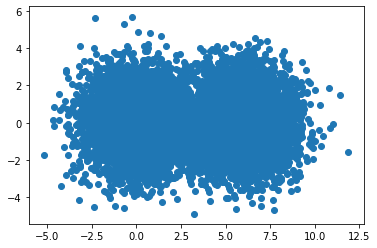

In [79]:
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)

plt.scatter(x_coordinates, y_coordinates)
plt.show()

In [80]:
from scipy.spatial.distance import euclidean
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)

darts = [[0,1], [6, 1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at position {dart} is closest to bulls-eye {index}")

The dart at position [0, 1] is closest to bulls-eye 0
The dart at position [6, 1] is closest to bulls-eye 1


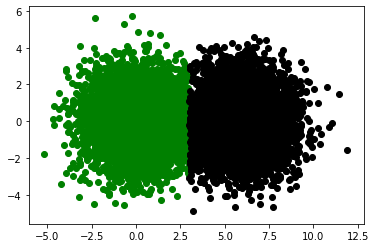

In [81]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates,
                    color=['g', 'k'][bs_index])
    plt.show()

darts = [[x_coordinates[i], y_coordinates[i]]
         for i in range(len(x_coordinates))]
color_by_cluster(darts)

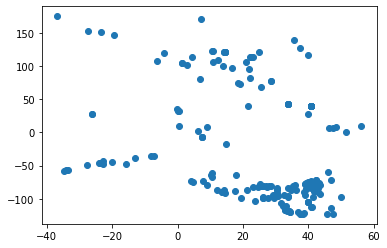

In [82]:
plt.scatter(pds.latitude, pds.longitude)
plt.show()

In [83]:
kmns  = KMeans()



X = np.array(pds[["latitude","longitude"]])
#y = np.array(dataframe['categoria'])
X.shape

(193, 2)

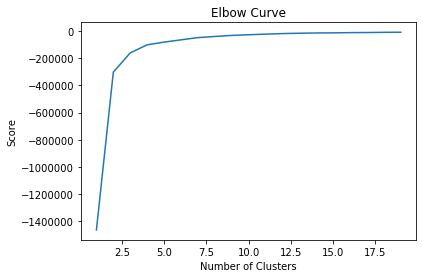

In [84]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()



In [94]:

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
print(centroids[0])
print(centroids[0][0])

[[ 26.144092    26.24051114]
 [ 26.81161168 -86.03659773]
 [ 11.52675795 114.43759308]]
[26.144092   26.24051114]
26.144092


In [86]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']

In [87]:
labels

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1,
       0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0])

In [88]:
asignar=[]
for row in labels:
    asignar.append(colores[row])

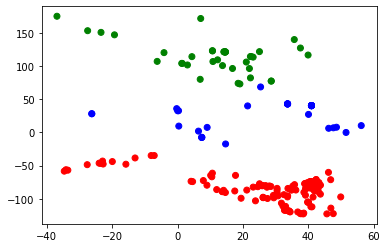

In [89]:
plt.scatter(pds.latitude, pds.longitude,c=asignar)
plt.show()

In [119]:
map = Basemap(projection='ortho', 
              lat_0=centroids[1][0], lon_0=centroids[1][1])

In [120]:
#pds.longitude.to_numpy()

In [121]:
xa, xy  = map(pds.longitude.to_numpy(), pds.latitude.to_numpy())

In [122]:
#xa

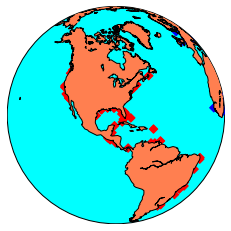

In [123]:
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
map.scatter(xa,xy ,marker='D',c=asignar)

plt.show()